# 2D Projective Transformation: Elation
This notebook serves to visualize the 2D projective transformation known as elation.

In [7]:
import numpy as np

# Set parameters as desired
p1, p2 = 0.05, 0.05

H = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [p1, p2, 1]
])

In [8]:
def elation_transform(x, y):
    """
    Apply the elation transformation to a point (x, y).
    """
    # Original point in homogeneous coordinates
    original_point = np.array([x, y, 1])

    # Applying the transformation
    transformed_point = np.dot(H, original_point)

    # Converting back to Cartesian coordinates
    x_new, y_new, _ = transformed_point / transformed_point[2]
    return x_new, y_new

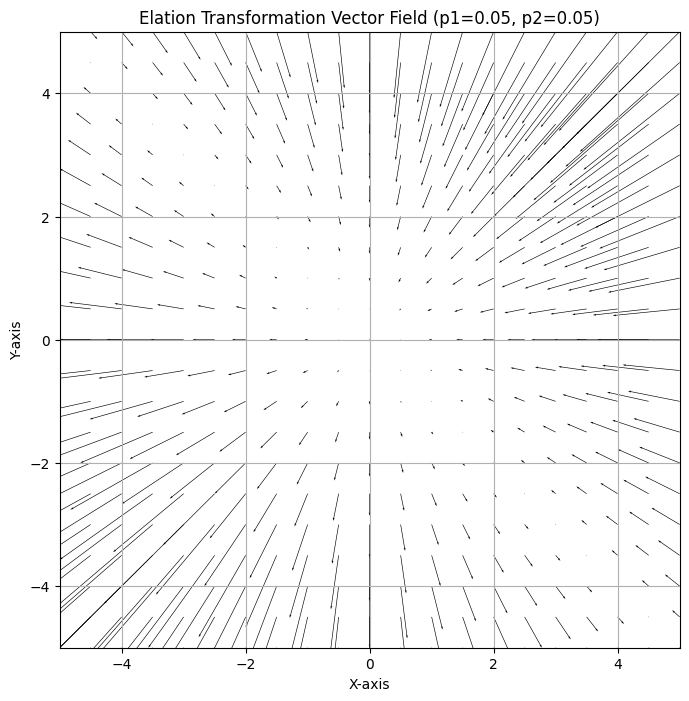

In [9]:
from matplotlib import pyplot as plt

# Create a grid of points
x = np.linspace(-5, 5, 21)
y = np.linspace(-5, 5, 21)
X, Y = np.meshgrid(x, y)

# Initialize arrays for transformed coordinates
U, V = np.zeros_like(X), np.zeros_like(Y)

# Apply the transformation to each point
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_new, y_new = elation_transform(X[i, j], Y[i, j])
        U[i, j], V[i, j] = x_new - X[i, j], y_new - Y[i, j]

# Plotting the vector field
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Elation Transformation Vector Field (p1={p1}, p2={p2})')
plt.grid(True)
plt.show()